# 03. Outliers & Data Transformation | القيم المتطرفة والتحويل

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 05, Unit 2** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 03. Outliers & Data Transformation | القيم المتطرفة والتحويل


**All concepts are explained in the code comments below - you can learn everything from this notebook alone!**

---

## 🔗 Solving the Problem from Example 2 | حل المشكلة من المثال 2

**Remember the dead end from Example 2?**
- We cleaned missing values and duplicates successfully
- But we discovered the cleaned data still had outliers
- Outliers were skewing our statistics and affecting analysis

**This notebook solves that problem!**
- We'll learn how to **detect** outliers using statistical methods
- We'll learn **strategies** for handling outliers (remove, transform, cap)
- We'll learn **data transformation** techniques (normalization, scaling)
- We'll **complete the data cleaning process** so we have truly clean data!

**This solves the outlier problem from Example 2!**

---

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 2: Missing Values & Duplicates** - Clean data first!
- ✅ **Understanding of statistics** (mean, median, standard deviation)

**If you haven't completed these**, you might struggle with:
- Understanding outlier detection methods
- Knowing when to remove vs transform outliers
- Understanding data transformations

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the THIRD example in Unit 2** - it solves the problem from Example 2!

**Why this example THIRD?**
- **Before** handling outliers, you need clean data (no missing values/duplicates)
- **Before** transforming data, you need to identify what needs transformation
- **After** this, your data is fully cleaned and ready for analysis/modeling

**Builds on**: 
- 📓 Example 2: Missing Values & Duplicates (we discovered outliers, now we fix them)

**Leads to**: 
- 📓 Example 4: Feature Transformation (scale, encode; then EDA and cuDF)
- 📓 Unit 3: Data Visualization (clean, transformed data is ready to visualize)
- 📓 Unit 4: Machine Learning (clean data is essential for modeling)

**Why this order?**
1. Clean data first (remove missing values and duplicates)
2. Then handle outliers (extreme values that skew results)
3. Finally transform data (normalize scales for modeling)

---

## The Story: Refining Your Ingredients | القصة: تحسين المكونات

Imagine you're preparing ingredients. **After** cleaning, you need to check for any bad 
items (outliers) and cut them to same sizes (transformation). **After** refinement, 
everything is perfect for cooking!

Same with data: **After** removing missing values and duplicates, we detect outliers 
(extreme values) and transform data (normalize scales). **After** refinement, data is 
perfect for analysis!

---

## Why Outliers & Transformation Matter | لماذا يهم

These techniques are essential because:
- **Outliers**: Skew statistics and predictions - must be handled
- **Transformation**: Normalize scales so features are comparable
- **Model Performance**: Clean, transformed data = better models
- **Analysis Accuracy**: Outliers can completely change results

## Learning Objectives | أهداف التعلم
1. Detect outliers using multiple methods (IQR, Z-score, visualization)
2. Handle outliers (remove, cap, or transform)
3. Apply data transformations (log, square root, normalization)
4. Understand when to use each transformation
5. Prepare data for machine learning models

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Statistical functions (Z-score calculation)
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Data transformation tools

print("✅ Libraries imported successfully!")
print("\n📚 What each library does:")
print("   - pandas: Data manipulation and analysis")
print("   - numpy: Numerical operations and random data generation")
print("   - matplotlib/seaborn: Visualization")
print("   - scipy.stats: Statistical functions (Z-scores, etc.)")
print("   - sklearn.preprocessing: Data transformation tools (MinMax, StandardScaler)")

print("\n" + "=" * 70)
print("Example 3: Outliers & Data Transformation | القيم المتطرفة والتحويل")
print("=" * 70)
print("\n📚 Prerequisites: Example 2 completed, clean data without missing values")
print("🔗 This is the THIRD and FINAL example in Unit 2 - final cleaning step")
print("🎯 Goal: Master outlier detection and data transformation techniques\n")

✅ Libraries imported successfully!

📚 What each library does:
   - pandas: Data manipulation and analysis
   - numpy: Numerical operations and random data generation
   - matplotlib/seaborn: Visualization
   - scipy.stats: Statistical functions (Z-scores, etc.)
   - sklearn.preprocessing: Data transformation tools (MinMax, StandardScaler)

Example 3: Outliers & Data Transformation | القيم المتطرفة والتحويل

📚 Prerequisites: Example 2 completed, clean data without missing values
🔗 This is the THIRD and FINAL example in Unit 2 - final cleaning step
🎯 Goal: Master outlier detection and data transformation techniques



## Part 1: Creating Sample Data with Outliers | الجزء الأول: إنشاء بيانات مع قيم متطرفة

**BEFORE**: We need to practice outlier detection, but we need data with outliers!

**AFTER**: We'll create a dataset with intentionally added outliers to practice on!

**Why this matters**: Real data has outliers - we need to practice detection methods!

## Step 1: Creating Data with Outliers | الخطوة 1: إنشاء بيانات مع قيم متطرفة

**BEFORE**: We have clean data but need to see what outliers look like.

**AFTER**: We'll create a dataset with intentional outliers to detect!

## 


In [2]:
print("\n1. Creating Data with Outliers")
print("-" * 70)
np.random.seed(42)
n_samples = 200
# Create normal data
normal_data = np.random.normal(1000, 200, n_samples - 10)
# Add outliers
outliers = np.array([2000, 2100, 2200, 180, 150, 2500, 2400, 100, 2300, 200])
# Combine
data_with_outliers = np.concatenate([normal_data, outliers])
df = pd.DataFrame({
'value': data_with_outliers, 'category': np.random.choice(['A', 'B', 'C'], len(data_with_outliers)),
'score': np.random.normal(75, 10, len(data_with_outliers))
})
print(f"✓ Created dataset with {len(df)} rows")
print(f"✓ Contains {len(outliers)} outliers")
print(f"✓      {len(df)} ")
print(f"✓   {len(outliers)}  ")


1. Creating Data with Outliers
----------------------------------------------------------------------
✓ Created dataset with 200 rows
✓ Contains 10 outliers
✓      200 
✓   10  


## Part 2: Detecting Outliers - Z-Score Method | الجزء الثاني: اكتشاف القيم المتطرفة - Z-Score

**BEFORE**: You have data but don't know which values are outliers.

**AFTER**: You'll use Z-scores to identify values that are too far from the mean!

**Why Z-score?** It's a statistical method that measures how many standard deviations a value is from the mean!

## Step 2: Z-Score Method | الخطوة 2: طريقة Z-Score

**BEFORE**: Outliers are hidden in our data.

**AFTER**: We'll use Z-scores to detect values that are more than 3 standard deviations away!

## 


In [3]:
print("\n\n2. Outlier Detection Z Score Method")
print("-" * 70)
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['value']))
threshold = 3
outliers_zscore = df[z_scores > threshold]
print(f"Outliers detected (Z-score > {threshold}): {len(outliers_zscore)}")
print(f"   (Z score > {threshold}): {len(outliers_zscore)}")
print(f"\nOutlier values:")
print(outliers_zscore[['value']].head())



2. Outlier Detection Z Score Method
----------------------------------------------------------------------
Outliers detected (Z-score > 3): 6
   (Z score > 3): 6

Outlier values:
      value
190  2000.0
191  2100.0
192  2200.0
195  2500.0
196  2400.0


## Part 3: Detecting Outliers - IQR Method | الجزء الثالث: اكتشاف القيم المتطرفة - IQR

**BEFORE**: Z-score works, but IQR is another powerful method.

**AFTER**: You'll use the Interquartile Range method to detect outliers!

**Why IQR?** It's robust to extreme values and works well for skewed distributions!

## Step 3: IQR Method | الخطوة 3: طريقة IQR

**BEFORE**: We detected outliers with Z-score, but want to compare methods.

**AFTER**: We'll use IQR (Interquartile Range) to detect outliers differently!

## 


In [4]:
print("\n\n3. Outlier Detection IQR Method")
print("-" * 70)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"Outliers detected (IQR method): {len(outliers_iqr)}")
print(f"   ( IQR): {len(outliers_iqr)}")



3. Outlier Detection IQR Method
----------------------------------------------------------------------
Q1: 856.86, Q3: 1123.03, IQR: 266.18
Lower bound: 457.59, Upper bound: 1522.30
Outliers detected (IQR method): 11
   ( IQR): 11


## Part 4: Visualizing Outliers | الجزء الرابع: تصوير القيم المتطرفة

**BEFORE**: You have numbers but can't see outliers clearly.

**AFTER**: You'll see visual plots that make outliers obvious!

**Why this matters**: Visualizations help you understand outlier patterns!

## Step 4: Visualizing Outliers | الخطوة 4: تصوير القيم المتطرفة

**BEFORE**: Outliers are detected but hard to visualize.

**AFTER**: We'll create multiple plots to see outliers clearly!

## 




4. Visualizing Outliers
----------------------------------------------------------------------


✓ Outlier visualization saved
✓     


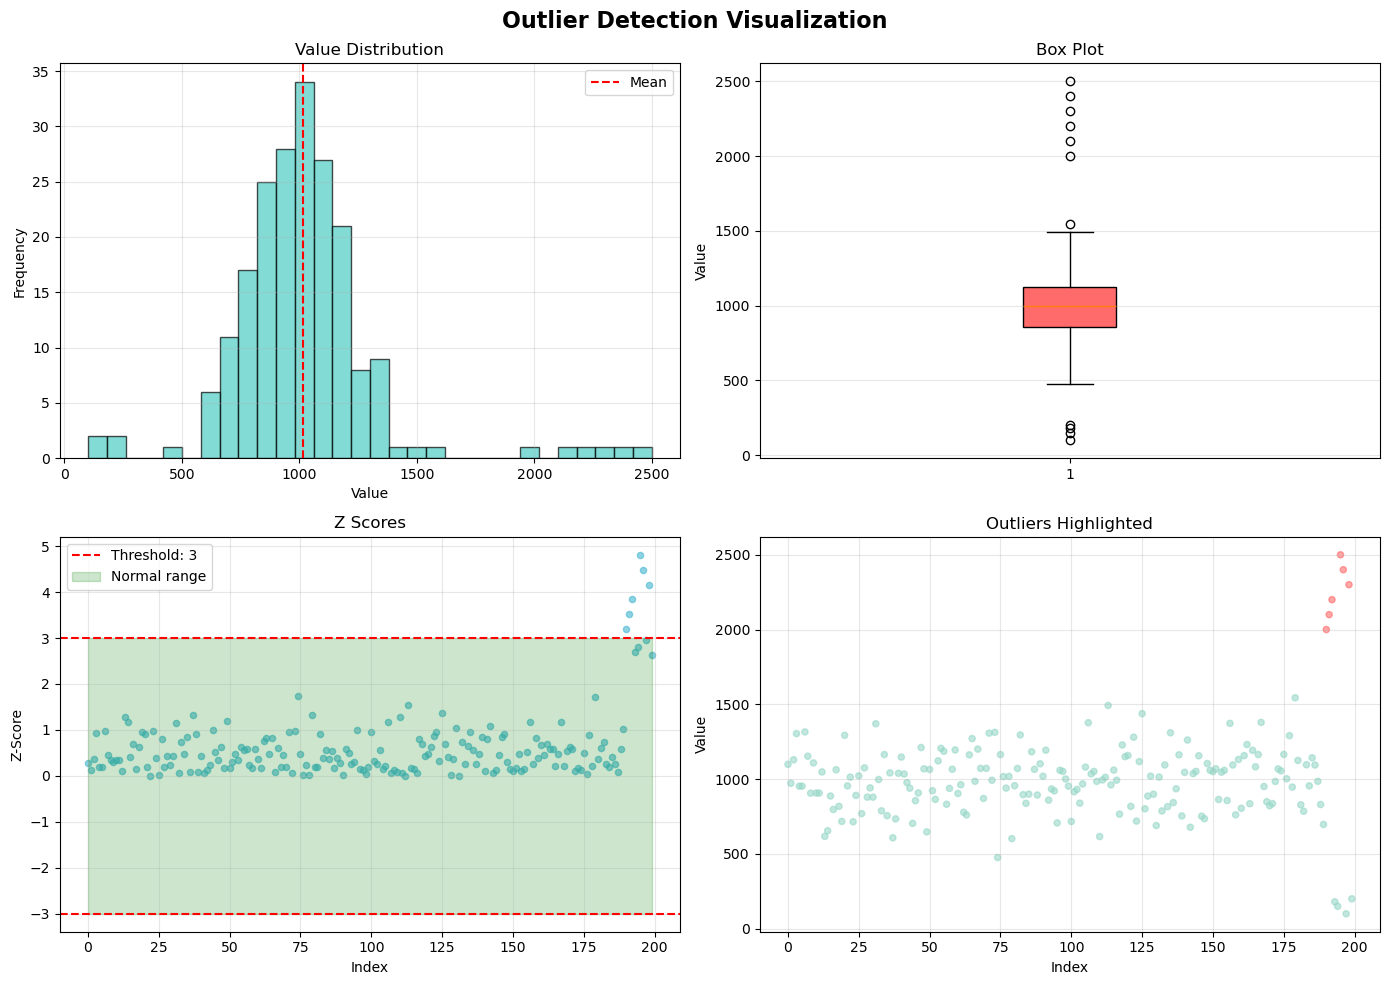

In [5]:
print("\n\n4. Visualizing Outliers")
print("-" * 70)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Outlier Detection Visualization', fontsize=16, weight='bold')
# Plot 1: Histogram
axes[0, 0].hist(df['value'], bins=30, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['value'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 0].set_title('Value Distribution')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
# Plot 2: Box plot
bp = axes[0, 1].boxplot(df['value'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('#FF6B6B')
axes[0, 1].set_title('Box Plot')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True, alpha=0.3, axis='y')
# Plot 3: Z-score
axes[1, 0].scatter(range(len(df)), z_scores, alpha=0.6, color='#45B7D1', s=20)
axes[1, 0].axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
axes[1, 0].axhline(y=-threshold, color='r', linestyle='--')
axes[1, 0].fill_between(range(len(df)), -threshold, threshold, alpha=0.2, color='green', label='Normal range')
axes[1, 0].set_title('Z Scores')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Z-Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
# Plot 4: Scatter with outliers highlighted
colors = ['#FF6B6B' if z > threshold else '#98D8C8' for z in z_scores]
axes[1, 1].scatter(range(len(df)), df['value'], c=colors, alpha=0.6, s=20)
axes[1, 1].set_title('Outliers Highlighted')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outliers_detection.png', dpi=300, bbox_inches='tight')
print("✓ Outlier visualization saved")
print("✓     ")

## Part 5: Data Transformation - Normalization | الجزء الخامس: تحويل البيانات - التطبيع

**BEFORE**: You have outliers detected but data is on different scales.

**AFTER**: You'll normalize data to a 0-1 range!

**Why normalization?** Makes all features comparable and helps ML models learn better!

## Step 5: Min-Max Normalization | الخطوة 5: التطبيع Min-Max

**BEFORE**: Data values range widely and aren't comparable.

**AFTER**: We'll transform data to 0-1 range for better comparability!

## 


In [6]:
print("\n\n5. Data Transformation Normalization")
print("-" * 70)
# Min-Max Normalization
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized['value_normalized'] = scaler_minmax.fit_transform(df[['value']])
print("Min Max Normalization:")
print(f"Original range: [{df['value'].min():.2f}, {df['value'].max():.2f}]")
print(f"Normalized range: [{df_normalized['value_normalized'].min():.2f}, {df_normalized['value_normalized'].max():.2f}]")



5. Data Transformation Normalization
----------------------------------------------------------------------
Min Max Normalization:
Original range: [100.00, 2500.00]
Normalized range: [0.00, 1.00]


## Part 6: Data Transformation - Standardization | الجزء السادس: تحويل البيانات - التوحيد القياسي

**BEFORE**: You normalized data, but standardization is another important method.

**AFTER**: You'll standardize data to have mean=0 and std=1!

**Why standardization?** Better for some ML algorithms (like neural networks)!

## Step 6: Standardization (Z-Score) | الخطوة 6: التوحيد القياسي (Z-Score)

**BEFORE**: Data is normalized but we want mean=0, std=1.

**AFTER**: We'll standardize data to standard normal distribution!

## 


In [7]:
print("\n\n6. Data Transformation Standardization")
print("-" * 70)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized['value_standardized'] = scaler_standard.fit_transform(df[['value']])
print("Standardization (Z score):")
print(f"Original mean: {df['value'].mean():.2f}, std: {df['value'].std():.2f}")
print(f"Standardized mean: {df_standardized['value_standardized'].mean():.4f}, std: {df_standardized['value_standardized'].std():.4f}")



6. Data Transformation Standardization
----------------------------------------------------------------------
Standardization (Z score):
Original mean: 1014.37, std: 309.59
Standardized mean: -0.0000, std: 1.0025


## Part 7: Before/After Comparison | الجزء السابع: مقارنة قبل وبعد

**BEFORE**: You have transformed data but can't see the difference.

**AFTER**: You'll visualize the transformation effects clearly!

**Why this matters**: See how transformations change your data distribution!

## Step 7: Transformation Comparison | الخطوة 7: مقارنة التحويلات

**BEFORE**: We've transformed data but haven't compared results.

**AFTER**: We'll visualize original vs normalized vs standardized data!

## 




7. BeforeAfter Comparison
----------------------------------------------------------------------


✓ Transformation comparison saved
✓    


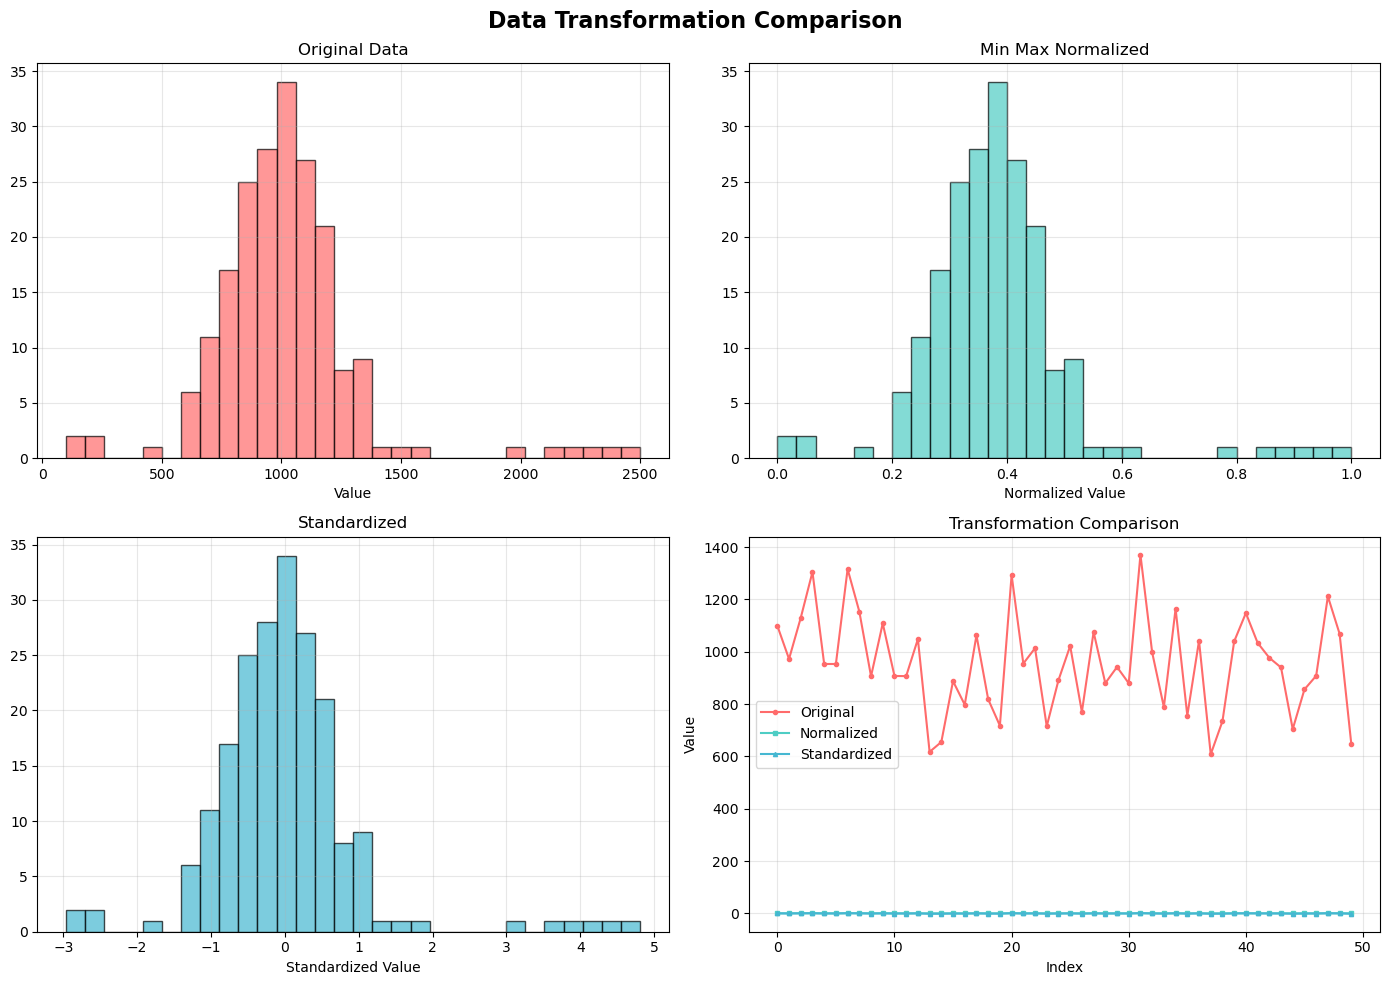

In [8]:
print("\n\n7. BeforeAfter Comparison")
print("-" * 70)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Data Transformation Comparison', fontsize=16, weight='bold')
# Original
axes[0, 0].hist(df['value'], bins=30, color='#FF6B6B', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Original Data')
axes[0, 0].set_xlabel('Value')
axes[0, 0].grid(True, alpha=0.3)
# Normalized
axes[0, 1].hist(df_normalized['value_normalized'], bins=30, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Min Max Normalized')
axes[0, 1].set_xlabel('Normalized Value')
axes[0, 1].grid(True, alpha=0.3)
# Standardized
axes[1, 0].hist(df_standardized['value_standardized'], bins=30, color='#45B7D1', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Standardized')
axes[1, 0].set_xlabel('Standardized Value')
axes[1, 0].grid(True, alpha=0.3)
# Comparison
axes[1, 1].plot(df['value'].values[:50], label='Original', color='#FF6B6B', marker='o', markersize=3)
axes[1, 1].plot(df_normalized['value_normalized'].values[:50], label='Normalized', color='#4ECDC4', marker='s', markersize=3)
axes[1, 1].plot(df_standardized['value_standardized'].values[:50], label='Standardized', color='#45B7D1', marker='^', markersize=3)
axes[1, 1].set_title('Transformation Comparison')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('data_transformation.png', dpi=300, bbox_inches='tight')
print("✓ Transformation comparison saved")
print("✓    ")

## 🎯 Summary: What We Learned | ملخص: ما تعلمناه


## Final Summary | الملخص النهائي


## 


In [9]:
print("\n" + "=" * 70)
print("🎯 SUMMARY: What We Learned")
print("=" * 70)

print("\n📋 BEFORE this notebook:")
print("   - You had clean data but didn't know how to handle outliers")
print("   - You didn't know how to transform data for machine learning")
print("   - Your data had different scales that confused your models")

print("\n✅ AFTER this notebook:")
print("   - You can detect outliers using Z-score and IQR methods")
print("   - You can visualize outliers to understand their patterns")
print("   - You can normalize data (Min-Max scaling to 0-1)")
print("   - You can standardize data (mean=0, std=1)")
print("   - You understand when to use each transformation")

print("\n📚 Key Concepts Covered:")
print("   1. Outlier Detection (Z-score method: values >3 std from mean)")
print("   2. Outlier Detection (IQR method: values outside Q1-1.5*IQR to Q3+1.5*IQR)")
print("   3. Outlier Visualization (histograms, box plots, scatter plots)")
print("   4. Data Normalization (Min-Max: scales to 0-1 range)")
print("   5. Data Standardization (Z-score: mean=0, std=1)")

print("\n🔗 Where These Skills Fit:")
print("   - FINAL step in Unit 2 data cleaning (after missing values and duplicates)")
print("   - Essential BEFORE machine learning (models need transformed data)")
print("   - Critical for data visualization (outliers affect visualizations)")
print("   - Foundation for reliable analysis and modeling!")

print("\n➡️  Next Steps:")
print("   - Continue to Example 4: Feature Transformation (scale, encode)")
print("   - Then Example 5–6 (EDA), 7 (cuDF), 8 (feature extraction)")
print("   - Clean, transformed data is perfect for creating beautiful visualizations!")

print("\n" + "=" * 70)
plt.show()


🎯 SUMMARY: What We Learned

📋 BEFORE this notebook:
   - You had clean data but didn't know how to handle outliers
   - You didn't know how to transform data for machine learning
   - Your data had different scales that confused your models

✅ AFTER this notebook:
   - You can detect outliers using Z-score and IQR methods
   - You can visualize outliers to understand their patterns
   - You can normalize data (Min-Max scaling to 0-1)
   - You can standardize data (mean=0, std=1)
   - You understand when to use each transformation

📚 Key Concepts Covered:
   1. Outlier Detection (Z-score method: values >3 std from mean)
   2. Outlier Detection (IQR method: values outside Q1-1.5*IQR to Q3+1.5*IQR)
   3. Outlier Visualization (histograms, box plots, scatter plots)
   4. Data Normalization (Min-Max: scales to 0-1 range)
   5. Data Standardization (Z-score: mean=0, std=1)

🔗 Where These Skills Fit:
   - FINAL step in Unit 2 data cleaning (after missing values and duplicates)
   - Essential